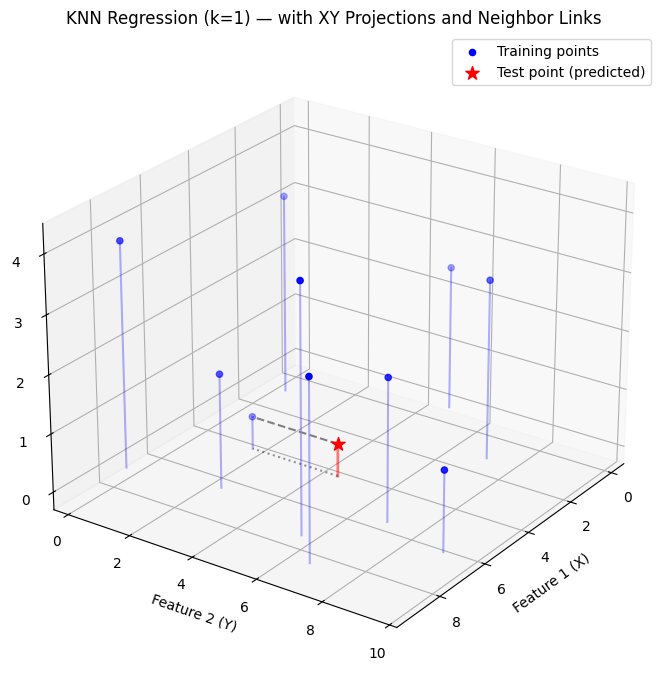

<Figure size 640x480 with 0 Axes>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsRegressor

N=10

# --- Generate synthetic data (2 features + 1 target) ---
np.random.seed(10)
X_train = np.random.rand(N, 2) * 10
y_train = np.sin(X_train[:, 0]) + np.cos(X_train[:, 1]) + np.random.randn(N) * 0.1+2

# --- Define and fit KNN regressor ---
k = 1
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

# --- Define a single test point ---
X_test = np.array([[5, 5]])
y_pred = knn.predict(X_test)

# --- Find nearest neighbors based on XY distance only ---
xy_dists = np.linalg.norm(X_train - X_test, axis=1)
neighbor_idx = np.argsort(xy_dists)[:k]

# --- 3D Visualization ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Training points
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='Training points')

# Projections of training points onto XY plane (z=0)
for i in range(len(X_train)):
    ax.plot([X_train[i, 0], X_train[i, 0]],
            [X_train[i, 1], X_train[i, 1]],
            [0, y_train[i]], color='blue', alpha=0.3)

# Test point (predicted)
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', marker='*', s=100, label='Test point (predicted)')

# Projection of test point onto XY plane
ax.plot([X_test[0, 0], X_test[0, 0]],
        [X_test[0, 1], X_test[0, 1]],
        [0, y_pred[0]], color='red', alpha=0.5, linewidth=2)

# Draw lines to nearest neighbors (distance computed in XY plane)
for i in neighbor_idx:
    x_vals = [X_test[0, 0], X_train[i, 0]]
    y_vals = [X_test[0, 1], X_train[i, 1]]
    z_vals = [y_pred[0], y_train[i]]
    ax.plot(x_vals, y_vals, z_vals, color='gray', linestyle='--', linewidth=1.5)

    # Optional: show their 2D connection on the XY plane (flat)
    ax.plot([X_test[0, 0], X_train[i, 0]],
            [X_test[0, 1], X_train[i, 1]],
            [0, 0], color='black', linestyle=':', alpha=0.4)

# --- Labels and style ---
ax.set_xlabel('Feature 1 (X)')
ax.set_ylabel('Feature 2 (Y)')
ax.set_zlabel('Target (Z)')
ax.set_title(f'KNN Regression (k={k}) — with XY Projections and Neighbor Links')
ax.legend()
ax.view_init(elev=25, azim=35)
plt.tight_layout()
plt.show()

plt.savefig(f'knn_regression_with_projections_knn_{k}.png')